<a href="https://colab.research.google.com/github/lourencocavalcante/Advanced-Topics-in-Environmental-Modeling/blob/main/INPE_CAP425_ProjetoFinal_PredictRain_Lourenco_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[<img src="https://github.com/lourencocavalcante/LogosINPE/blob/main/logoinpe.png?raw=true" width = 500 align="left">](https://www.gov.br/inpe/pt-br)

[<img src="https://github.com/lourencocavalcante/LogosINPE/blob/main/LogoCAP.png?raw=true" width = 300 align="right">](http://www.inpe.br/posgraduacao/cap/)

# **Projeto Final da disciplina de Tópicos Avançados em Modelagem Ambiental (CAP-425)**
**Professores:**
*Dr. Leonardo Bacelar Lima Santos e Dr. Stephan Stephany*

**Aluno:**
*Lourenço José Cavalcante Neto*
<hr style="border:2px solid #0077b9;">

# **<span style="color:#336699">Aplicação de Redes Neurais Artificiais na classificação da chuva a partir de dados meteorológicos obtidos por disdrômetro e radiômetro de microondas</span>**

<hr style="border:2px solid #0077b9;">



# **INTRODUÇÃO**

A previsão ou classificação da chuva segundo a sua intensidade tem sido uma das grandes preocupações mundiais. É um tema que está no radar de diversos pesquisadores e, além disso, tem atraído a atenção de indústrias, governos e de companhias aéreas, por ter relação direta com planejamentos e tomada de decisão.

No campo da meteorologia, é bem conhecido que a variável chuva possui muitas características bem diversas - devido a  sua distribuição espacial e temporal -, que dependem dos mecanismos físicos responsáveis pelas chuvas. Algumas pesquisas indicam que nos encontramos diante de um problema complexo e, por consequência disso, tem sido difícil de resolver. Essa variável é a apresenta maior correlação com eventos naturais adversos, como deslizamentos de terra, inundações, movimentos de massa e avalanches. Esses incidentes afetam a sociedade há anos \cite{b2}.

Uma das possibilidades de solução consistiria em se beneficiar de grandes bases de dados climáticos disponíveis, afim de estudar e classificar a chuva tomando como referência, entre outros fatores, as características relacionadas à sua ocorrência e intensidade. Para este estudo e por se tratar de um ponto focal específico, a intensidade horária média da preciptação em mm/h ficou definida conforme exibido na tabela abaixo:

# **ANÁLISE DO PROBLEMA**
O comportamento dos fenômenos pluviométricos tem relação forte com a precipitação local e repentina. Resultados de pesquisas recentes apontam que o clima e a capacidade humana de predizê-lo com o máximo de precisão possível têm desempenhado um papel crítico em muitos aspectos da vida. De atividades agrícolas ao planejamento para o final de semana de uma família, as companhias aéreas e a tomada de decisões logísticas, a chuva tem grande influência nos planejamentos. Há registros de casos em que o impacto da chuva causou grandes consequências financeiras. Paralelo a isso, é possível perceber que há um grande número de interessados no avanço do conhecimento neste tema e por consquência, aperfeiçoar a capacidade de prever e classificar a chuva com mais precisão. 

A pergunta de pesquisa que se pretende responder neste trabalho é: **em qual nível de acurácia um modelo preditivo consegue classificar a chuva, a partir de dados metorológicos oriundos do Disdrômetro RD80 e do Radiômetro de Microondas MP3000A, como chuva fraca, chuva moderada, chuva forte ou chuva muito forte?**

# **OBJETIVO**
O objetivo deste projeto é criar um modelo de **Rede Neural Artificial** da família **Multilayer Perceptron (MLP)** que seja capaz de auxiliar na classificação da chuva, usando dados de chuva disponíveis.

Este notebook também pode ser visualizado no meu diretório de materiais e atividades da disciplina CAP-425 no Github, [Clicando aqui](https://github.com/lourencocavalcante/Advanced-Topics-in-Environmental-Modeling.git).



---



# **OS DADOS**
Os dados meteorológicos são oriundos de dois equipamentos (**Radiômetro de Microondas "MP3000A"** e o **Disdrômetro "RD80"**), ambos instalados próximo à torre ATTO, em um sítio chamado Campina, na região Amazônica. O MP3000A mede diversas variáveis ambiente, entre elas a radiância no espectro de onda do microonda em diversos canais e estimativas de parâmetros de nuvens. Já o RD80 mede a distribuição das gotas de chuva que chegam à superfície.

Os dados compreendem o período de 17 de março de 2020 a 07 julho 2022.

# **METODOLOGIA**
Visto que já foi realizada uma Análise Exploratória nos dados, tal qual foram observadas, principalmente, as variações nos padrões de chuva, a metodologia que será aplicada para o desenvolvimento deste trabalho será conforme segue abaixo: 
* Importação dos módulos e bibliotecas e o download dos dados para o ambiente de execução; 
* Conversão de dados para o formato que possibilite a realização dos experimentos e testes;
* Divisão dos dados em treinamento, validação e teste;

Por fim, tentaremos aplicar uma abordagem de aprendizado de máquina (Machine Learning), implementando e treinando uma Rede Neural da família multilayer perceptron (MLP) que seja capaz de  classificar a chuva.

# **IMPORTAÇÃO DOS MODULOS DE BIBLIOTÉCAS**
São várias as bibliotecas que podem ser utilizadas para realizar o pré-processamento de dados. Entre elas podemos destacar a biblioteca **Pandas**. Trata-se de uma biblioteca para leitura, manipulação e análise de dados tabulados. Essa biblioteca oferece estruturas de dados e operações para manipular conjuntos massivos de tabelas numéricas e séries temporais de forma otimizada. No python, por convensão, as bibliotecas são importadas conforme podemos ver na célula abaixo:

In [ ]:
!pip install smote_variants

In [219]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from random import choice

warnings.simplefilter('ignore')

In [220]:
%matplotlib inline

In [221]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score, plot_confusion_matrix, mean_squared_error, mean_absolute_error,confusion_matrix, accuracy_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from math import sqrt


import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM,Flatten
from keras.activations import sigmoid, softmax

from keras.layers import Dense, BatchNormalization, Dropout, LSTM
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import Adam
#from keras.regularizers import regularizers
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from keras import callbacks


# **OBTENDO OS ARQUIVOS DE DADOS**

Temos 01 arquivo de dados (Dataset):

**df_RD80_MP3000A_for_ClassifierRainfall**: Neste arquivo estão os dados do ambiente próximo à superfície, os dados das medidas dos canais do microonda, as variáveis estimadas associadas a parâmetros de nuvens e dados de medida da distribuição das gotas de chuva que chegam à superfície. Vamos realizar o download do Dataset:

In [222]:
#Vamos baixar os dados do Google Drive para o ambiente de execução do nosso Notebook
!gdown --id 1JnvYuUCODjwIxb8v4LEP0Jk7FL_y1tGt


/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1JnvYuUCODjwIxb8v4LEP0Jk7FL_y1tGt
To: /content/df_MP3000A_RD80_final.csv
100% 13.9M/13.9M [00:00<00:00, 62.8MB/s]


# **PREPROCESSAMENTO E VISUALIZAÇÃO DOS DADOS**

Os dados já foram tratados na fase aneterior deste trabalho. A partir daqui, o primeiro passo é abrir o CSV com o Pandas. Em uma visão inicial dos dados, temos:

In [223]:
#Carregar o Dataset e criar o Dataframe
df_RD80_final = pd.read_csv("/content/df_MP3000A_RD80_final.csv",parse_dates=[0], index_col=[0])
#df_RD80_final = df_RD80.loc[df_RD80['Rain_Intensity_mm_h'] > 0] #Vamos considerar somente os dias que choveram

In [224]:
#Aqui verificamos o tamanho do Dataset e quantidade de atributos 
print('Tamanho do dataset: ',df_RD80_final.shape[0], ' - Quantidade de atributos: ', df_RD80_final.shape[1])

Tamanho do dataset:  38325  - Quantidade de atributos:  68


In [225]:
#Vamos visualizar as primeiras 2 e últimas 2 linhas dos dados
df_RD80_final.loc[df_RD80_final['DataQuality'] == 1].head(n=5).append(df_RD80_final.loc[df_RD80_final['DataQuality'] == 1].tail(n=5))

,Ano,Mes,dia,H,M,S,Rain_Intensity_mm_h,radar_reflectivity_1_mm6m3,Liquid_watercontent_g_m3,Mean_weight_diameter_mm,...,Very_Heavy_Rain,Without_Rain,Class_Rain_id,Class_Rain,Date,Year,Month,Day_of_week,Time,session
15017,2021,8,15,15,8,0,0.24632,26.14197,0.02150,0.78884,...,0,0,1,Chuva fraca,2021-08-15,2021,Aug,Sunday,15:08:00,Afternoon
21875,2021,10,10,14,2,0,0.00470,0.10926,0.00078,0.41340,...,0,1,0,Não choveu,2021-10-10,2021,Oct,Sunday,14:02:00,Afternoon
23744,2021,11,6,21,11,0,0.06033,9.64492,0.00517,0.83003,...,0,1,0,Não choveu,2021-11-06,2021,Nov,Saturday,21:11:00,Evening
26436,2021,11,8,18,3,0,0.15814,19.52376,0.01257,0.87190,...,0,0,1,Chuva fraca,2021-11-08,2021,Nov,Monday,18:03:00,Afternoon
26467,2021,11,8,18,34,0,2.93372,1107.89575,0.17042,1.33077,...,0,0,2,Chuva moderada,2021-11-08,2021,Nov,Monday,18:34:00,Afternoon
276820,2022,5,29,21,19,0,2.09853,803.45435,0.11511,1.41234,...,0,0,1,Chuva fraca,2022-05-29,2022,May,Sunday,21:19:00,Evening
278093,2022,5,30,18,32,0,1.90520,359.81525,0.12783,1.06897,...,0,0,1,Chuva fraca,2022-05-30,2022,May,Monday,18:32:00,Afternoon
278114,2022,5,30,18,53,0,1.79349,642.84375,0.10457,1.31882,...,0,0,1,Chuva fraca,2022-05-30,2022,May,Monday,18:53:00,Afternoon
278387,2022,5,31,15,50,0,0.07105,3.28447,0.00861,0.55936,...,0,1,0,Não choveu,2022-05-31,2022,May,Tuesday,15:50:00,Afternoon
278678,2022,5,31,20,41,0,9.89920,3345.32812,0.54928,1.37862,...,0,0,2,Chuva moderada,2022-05-31,2022,May,Tuesday,20:41:00,Evening


In [226]:
df_RD80_final.columns

Index(['Ano', 'Mes', 'dia', 'H', 'M', 'S', 'Rain_Intensity_mm_h',
       'radar_reflectivity_1_mm6m3', 'Liquid_watercontent_g_m3',
       'Mean_weight_diameter_mm', 'Time_integration_s', 'N_D1', 'N_D2', 'N_D3',
       'N_D4', 'N_D5', 'N_D6', 'N_D7', 'N_D8', 'N_D9', 'N_D10', 'N_D11',
       'N_D12', 'N_D13', 'N_D14', 'N_D15', 'N_D16', 'N_D14.1', 'N_D18',
       'N_D19', 'N_D20', 'Ch_22_234', 'Ch_22_500', 'Ch_23_034', 'Ch_23_834',
       'Ch_25_000', 'Ch_26_234', 'Ch_28_000', 'Ch_30_000', 'Ch_51_248',
       'Ch_51_760', 'Ch_52_280', 'Ch_52_804', 'Ch_53_336', 'Ch_53_848',
       'Ch_54_400', 'Ch_54_940', 'Ch_55_500', 'Ch_56_020', 'Ch_56_660',
       'Ch_57_288', 'Ch_57_964', 'Ch_58_800', 'DataQuality', 'Datetime',
       'Light_Rain', 'Moderate_Rain', 'Heavy_Rain', 'Very_Heavy_Rain',
       'Without_Rain', 'Class_Rain_id', 'Class_Rain', 'Date', 'Year', 'Month',
       'Day_of_week', 'Time', 'session'],
      dtype='object')

Vamos reordenar as colunas do Dataframe

In [227]:
df_RD80_final = df_RD80_final.reindex(columns=['Datetime', 'Ano', 'Mes', 'dia', 'H', 'M', 'S', 'Rain_Intensity_mm_h',
       'radar_reflectivity_1_mm6m3', 'Liquid_watercontent_g_m3',
       'Mean_weight_diameter_mm', 'Time_integration_s', 'N_D1', 'N_D2', 'N_D3',
       'N_D4', 'N_D5', 'N_D6', 'N_D7', 'N_D8', 'N_D9', 'N_D10', 'N_D11',
       'N_D12', 'N_D13', 'N_D14', 'N_D15', 'N_D16', 'N_D14.1', 'N_D18',
       'N_D19', 'N_D20', 'Ch_22_234', 'Ch_22_500', 'Ch_23_034', 'Ch_23_834',
       'Ch_25_000', 'Ch_26_234', 'Ch_28_000', 'Ch_30_000', 'Ch_51_248',
       'Ch_51_760', 'Ch_52_280', 'Ch_52_804', 'Ch_53_336', 'Ch_53_848',
       'Ch_54_400', 'Ch_54_940', 'Ch_55_500', 'Ch_56_020', 'Ch_56_660',
       'Ch_57_288', 'Ch_57_964', 'Ch_58_800', 
       'Light_Rain', 'Moderate_Rain', 'Heavy_Rain', 'Very_Heavy_Rain',
       'Without_Rain', 'Class_Rain_id', 'Class_Rain', 'Date', 'Year', 'Month',
       'Day_of_week', 'Time', 'session', 'DataQuality'])

In [228]:
df_RD80_final.columns

Index(['Datetime', 'Ano', 'Mes', 'dia', 'H', 'M', 'S', 'Rain_Intensity_mm_h',
       'radar_reflectivity_1_mm6m3', 'Liquid_watercontent_g_m3',
       'Mean_weight_diameter_mm', 'Time_integration_s', 'N_D1', 'N_D2', 'N_D3',
       'N_D4', 'N_D5', 'N_D6', 'N_D7', 'N_D8', 'N_D9', 'N_D10', 'N_D11',
       'N_D12', 'N_D13', 'N_D14', 'N_D15', 'N_D16', 'N_D14.1', 'N_D18',
       'N_D19', 'N_D20', 'Ch_22_234', 'Ch_22_500', 'Ch_23_034', 'Ch_23_834',
       'Ch_25_000', 'Ch_26_234', 'Ch_28_000', 'Ch_30_000', 'Ch_51_248',
       'Ch_51_760', 'Ch_52_280', 'Ch_52_804', 'Ch_53_336', 'Ch_53_848',
       'Ch_54_400', 'Ch_54_940', 'Ch_55_500', 'Ch_56_020', 'Ch_56_660',
       'Ch_57_288', 'Ch_57_964', 'Ch_58_800', 'Light_Rain', 'Moderate_Rain',
       'Heavy_Rain', 'Very_Heavy_Rain', 'Without_Rain', 'Class_Rain_id',
       'Class_Rain', 'Date', 'Year', 'Month', 'Day_of_week', 'Time', 'session',
       'DataQuality'],
      dtype='object')

No df_MP3000A_final, a unidade de medida dos canais Ch 22.234, Ch 22.500, Ch 23.034, Ch 23.834, Ch 25.000, Ch 26.234, Ch 28.000, Ch 30.000, Ch 51.248, Ch 51.760, Ch 52.280, Ch 52.804, Ch 53.336, Ch 53.848, Ch 54.400, Ch 54.940, Ch 55.500, Ch 56.020, Ch 56.660, Ch 57.288, Ch 57.964, Ch 58.800 é em K (Kelvin). Assim como é para Tamb e Tir. Vamos aplicar a conversão de K (Kelvin) para °C (Celsius).

In [229]:
#df_RD80_MP3000A_DataQuality.info()

In [230]:
df_RD80_final['Datetime'] = pd.to_datetime(df_RD80_final['Datetime'])

In [231]:
df_RD80_final['Ch_28_000'] = df_RD80_final['Ch_28_000'].str.replace('*','')

In [232]:
df_RD80_final['Ch_28_000'] = df_RD80_final['Ch_28_000'].astype(float)

In [233]:
#Mudando os formato para (float)
df_RD80_final[['Ch_22_234', 'Ch_22_500', 'Ch_23_034', 'Ch_23_834', 'Ch_25_000', 'Ch_26_234',
       'Ch_30_000', 'Ch_58_800']] = df_RD80_final[['Ch_22_234', 'Ch_22_500', 'Ch_23_034', 'Ch_23_834', 'Ch_25_000', 'Ch_26_234',
       'Ch_30_000', 'Ch_58_800']].astype(float)

In [234]:
#Conversão de Kelvin(K) para Celcius(°C)
convert_k_c = ['Ch_22_234', 'Ch_22_500', 'Ch_23_034', 'Ch_23_834', 'Ch_25_000', 'Ch_26_234','Ch_30_000', 'Ch_58_800']

for k_c in range(0, len(convert_k_c)):
 df_RD80_final[convert_k_c[k_c]]-273.15

In [235]:
#df_RD80_final.loc[df_RD80_final['Ch_30_000'] < 0, 'Ch_30_000'] = -df_RD80_final['Ch_30_000']

In [236]:
df_RD80_final = df_RD80_final.set_index('Datetime')

## **Encontrando correlações com o Heatmap**

Primeiramente, vamos codificar a variável categórica **Class_Rain** usando uma função de substituição:

In [237]:
df_RD80_final['Class_Rain'].replace({'Não choveu':0,'Chuva fraca':1, 'Chuva moderada': 2, 'Chuva forte': 3, 'Chuva muito forte': 4}, inplace = True)


In [238]:
df_RD80_final_features = ['Rain_Intensity_mm_h','Ch_22_234', 'Ch_22_500', 'Ch_23_034', 'Ch_23_834', 'Ch_25_000', 'Ch_26_234',
       'Ch_30_000', 'Ch_58_800', 'Class_Rain', 'DataQuality']

In [239]:
df_RD80_MP3000A  = df_RD80_final

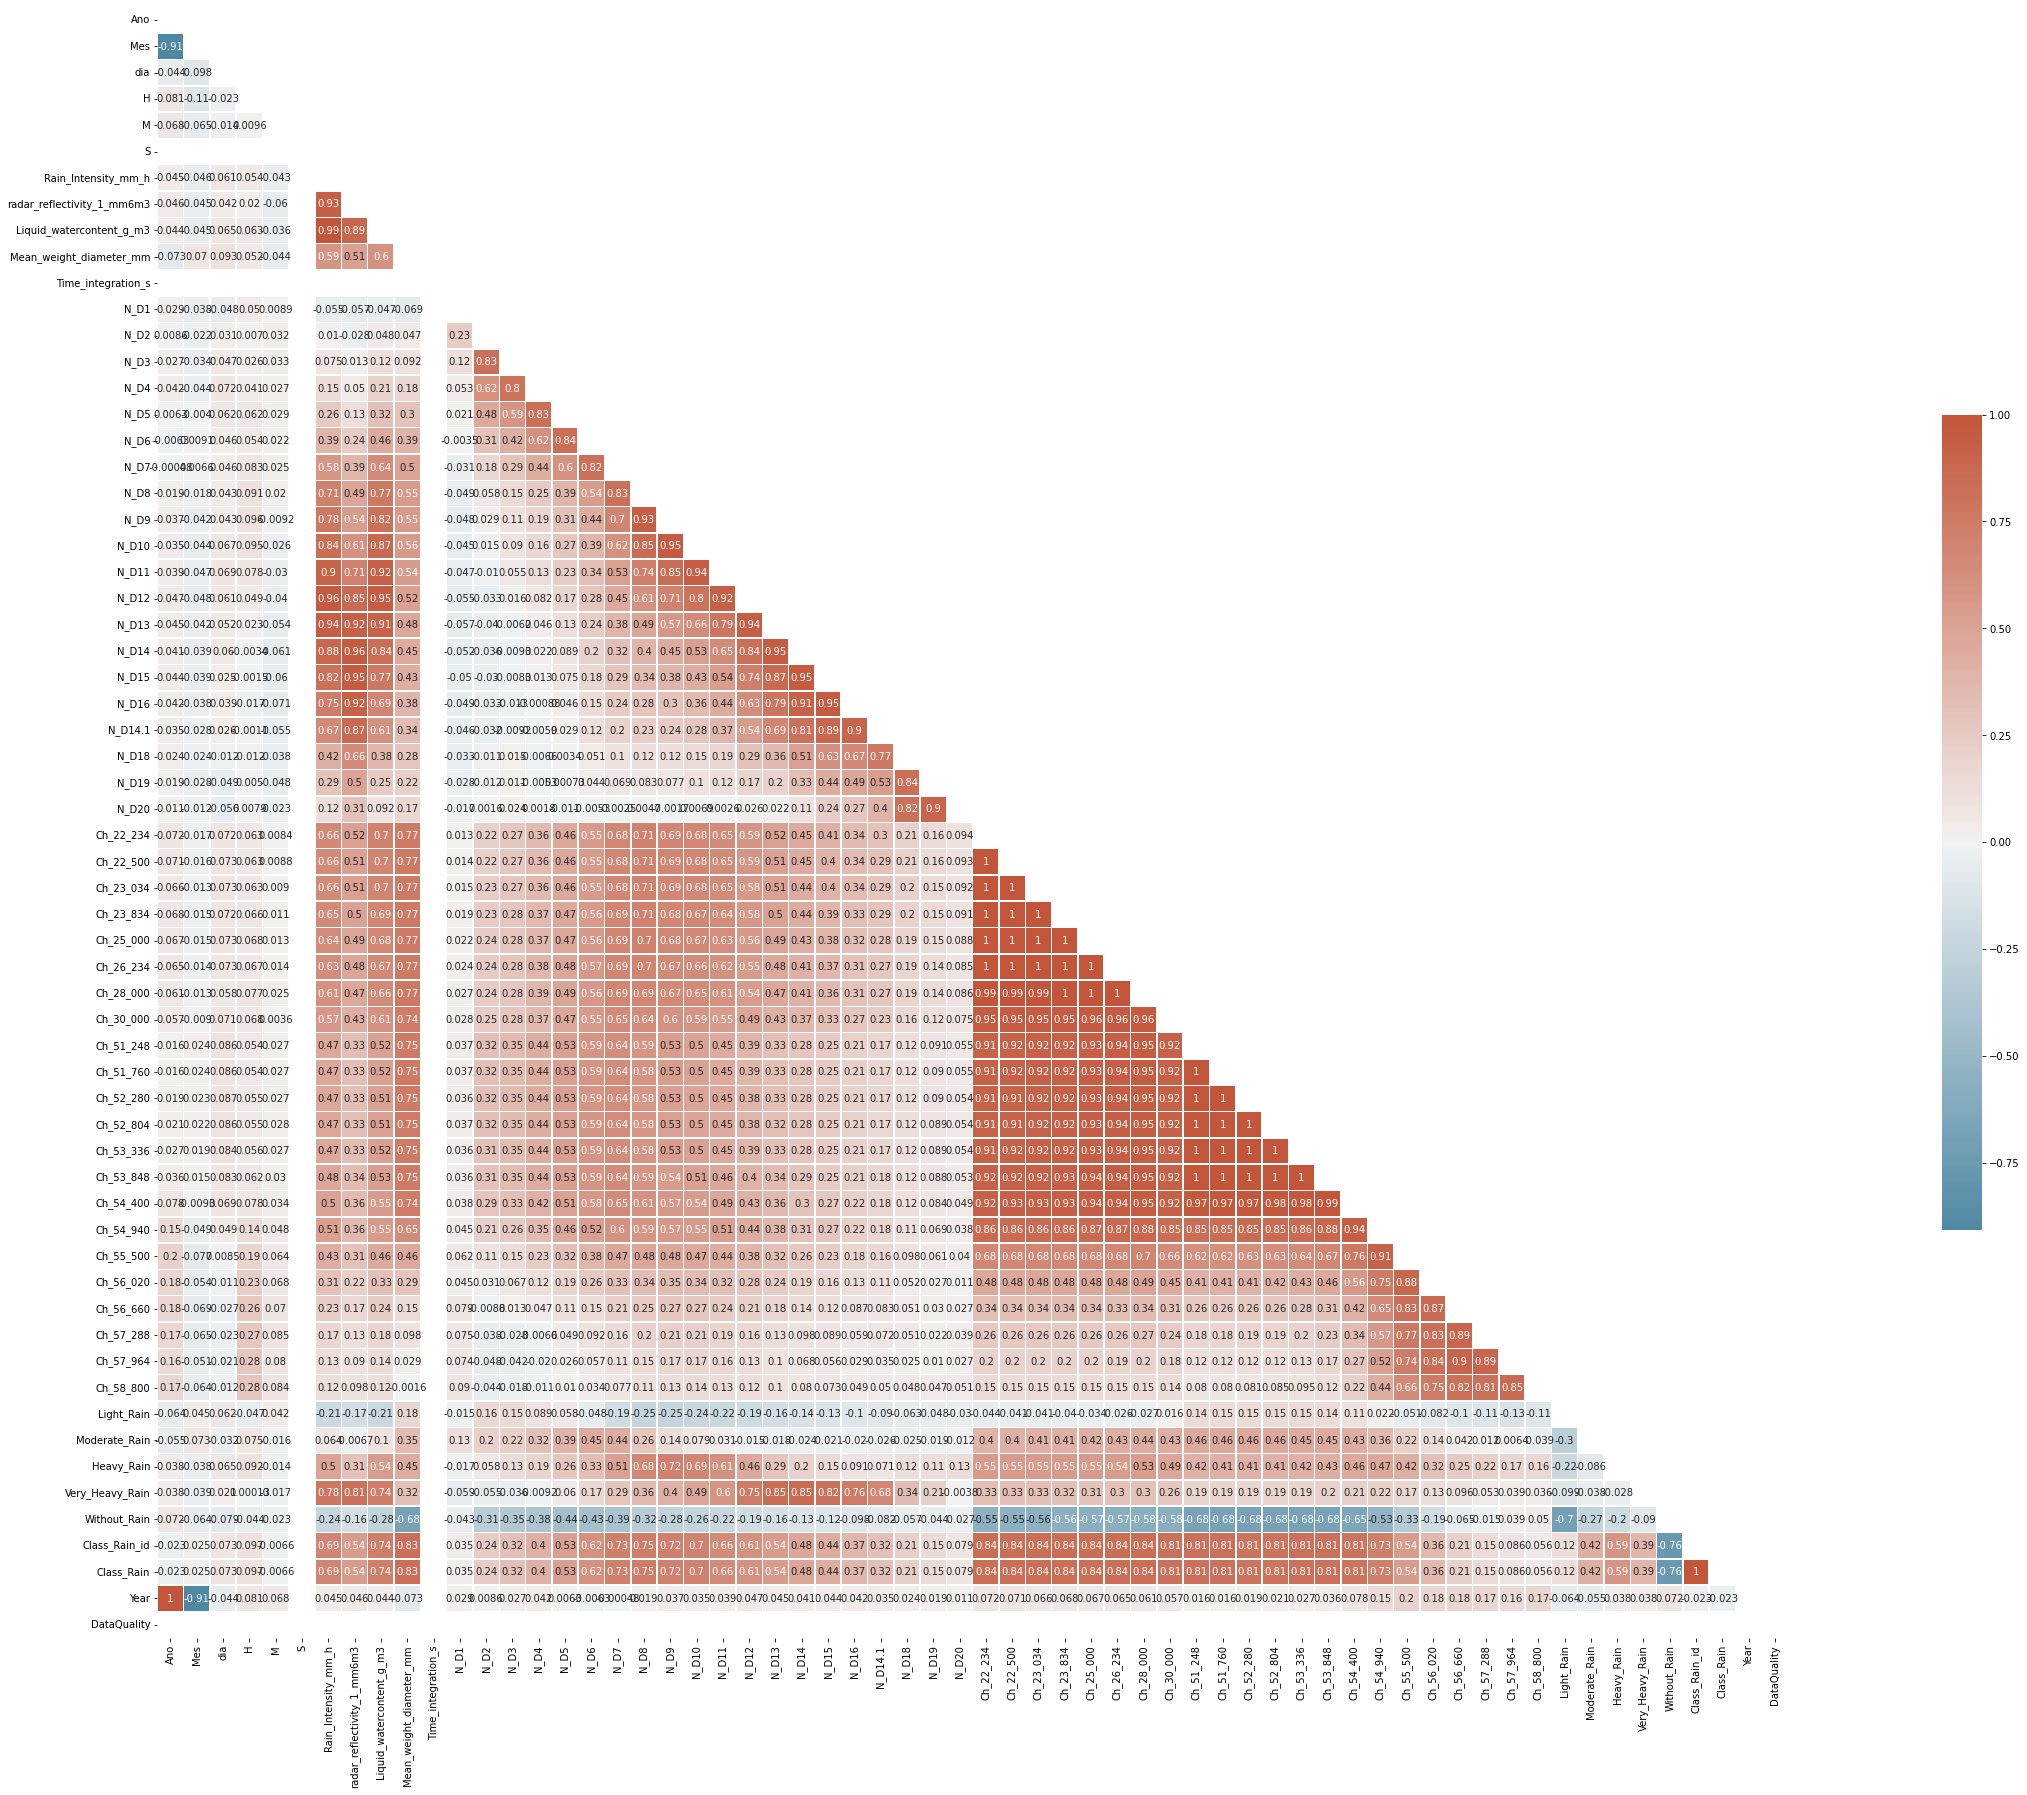

In [240]:
# Generate a mask for the upper triangle
df_RD80_MP3000A_DataQuality = df_RD80_MP3000A.query("DataQuality == 1")
corr = df_RD80_MP3000A_DataQuality.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(55, 30))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})

Vamos visualizar o gráfico da série temporal dos registros de chuva mm/h para todo o período dos dados, olhando apenas os registros de chuva. Ou seja, apenas onde variável Rain_Intensity_mm_h teve registros acima de 0.1mm/h.

In [241]:
df_RD80_MP3000A_DataQuality = df_RD80_MP3000A_DataQuality.reset_index()

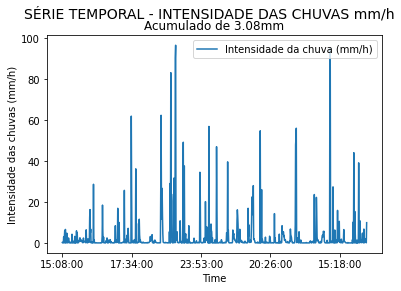

In [242]:
#Filtrando apenas onde houve registros de chuva

tot = round(df_RD80_MP3000A_DataQuality.Rain_Intensity_mm_h.mean(),2)
ax = plt.gca()
plt.rcParams["figure.figsize"] = [18,6]
plt.suptitle('SÉRIE TEMPORAL - INTENSIDADE DAS CHUVAS mm/h', size=14)
plt.title('Acumulado de ' + str(tot)+'mm')
plt.ylabel("Intensidade das chuvas (mm/h)")
plt.xlabel("Mês do ano")
df_RD80_MP3000A_DataQuality.plot(kind="line",x="Time",y="Rain_Intensity_mm_h",label='Intensidade da chuva (mm/h)', ax=ax)
#plt.yscale('log')

In [243]:
df_filter_MP3000A_RD80_TB_RAIN = df_RD80_MP3000A_DataQuality.query("(Datetime >= '2022-04-12 00:00:00' and Datetime <= '2022-04-12 23:59:59') and (H == 1 or H == 2 or H == 3 or H == 4 or H == 5 or H == 6 or H == 7 or H == 8 or H == 9 or H == 10 or H == 11 or H == 12 or H == 13 or H == 14 or H == 15 or H == 16 or H == 17 or H == 18 or H == 19 or H == 20 or H == 21 or H == 22 or H == 23)")


Vamos visualizar o acumulado da intensidade da chuva para todo o período dos dados, olhando apenas os registros de chuva, usando como referência a variável Rain_Intensity_mm_h.

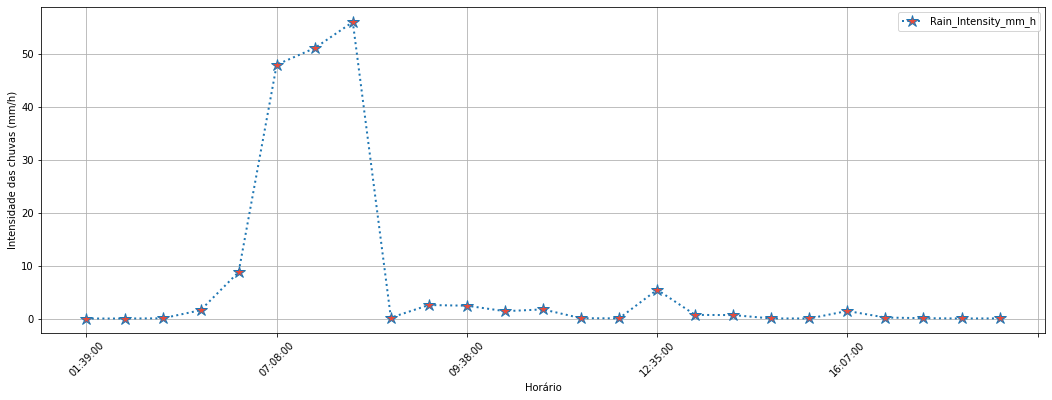

In [244]:
#Plotando o acumulado da intensidade da chuva por horário do dia

ax = plt.gca()
plt.rcParams["figure.figsize"] = [10,4]

df_filter_MP3000A_RD80_TB_RAIN.plot(kind="line",x="Time",y="Rain_Intensity_mm_h",label='Rain_Intensity_mm_h', linestyle='dotted', linewidth = 2, marker='*', markerfacecolor='#E74C3C', markersize=13, ax=ax)
plt.ylabel("Intensidade das chuvas (mm/h)")
plt.xlabel("Horário")
#plt.yscale('log')
plt.xticks(rotation = 45)
plt.grid(True)

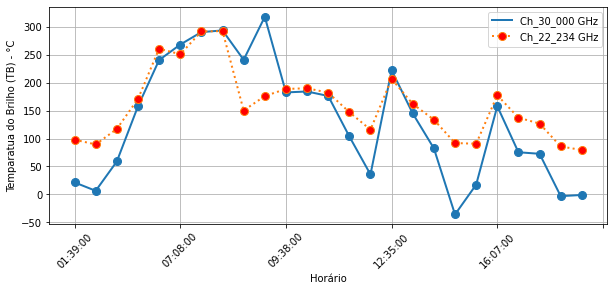

In [245]:
ax = plt.gca()
plt.rcParams["figure.figsize"] = [10,5]

df_filter_MP3000A_RD80_TB_RAIN.plot(kind='line',x='Time',y="Ch_30_000", label='Ch_30_000 GHz',linewidth = 2,linestyle='solid', marker='o', markersize=8, ax=ax)
df_filter_MP3000A_RD80_TB_RAIN.plot(kind='line',x='Time',y="Ch_22_234", label='Ch_22_234 GHz',linewidth = 2,linestyle='dotted', marker='o', markerfacecolor='r', markersize=8, ax=ax)
plt.ylabel("Temparatua do Brilho (TB) - °C")
plt.xlabel("Horário")
plt.xticks(rotation = 45)
#plt.yscale('log')
plt.grid(True)



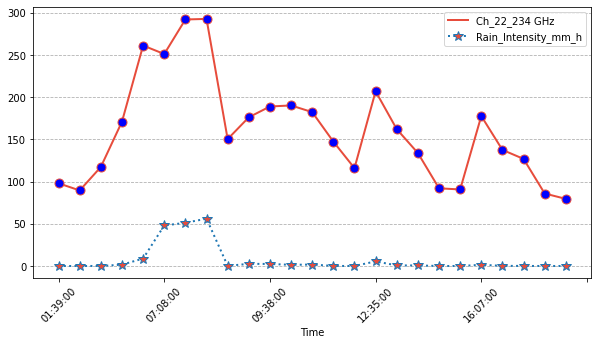

In [246]:
#Plotando o acumulado da intensidade da chuva por horário do dia
ax = plt.gca()
plt.rcParams["figure.figsize"] = [7,5]

df_filter_MP3000A_RD80_TB_RAIN.plot(kind='line',x='Time',y="Ch_22_234", label='Ch_22_234 GHz',color='#E74C3C',linewidth = 2,linestyle='solid', marker='o', markerfacecolor='blue', markersize=9, ax=ax)
df_filter_MP3000A_RD80_TB_RAIN.plot(kind="line",x="Time",y="Rain_Intensity_mm_h",label='Rain_Intensity_mm_h', linestyle='dotted', linewidth = 2, marker='*', markerfacecolor='#E74C3C', markersize=11, ax=ax)

#plt.yscale('log')
plt.xticks(rotation = 45)
plt.grid(False, axis='y', linestyle='--')

In [247]:
#df_RD80_MP3000A = df_RD80_MP3000A.resample('M').mean()

In [248]:
df_RD80_MP3000A_DataQuality['Class_Rain'].replace({0:'Não choveu', 1:'Chuva fraca', 2:'Chuva moderada', 3:'Chuva forte', 4:'Chuva muito forte'}, inplace = True)

Vamos olhar como está a **Proporção de classes** do nosso Dataset

In [249]:
df_RD80_MP3000A_DataQuality['Class_Rain'].value_counts()

Chuva fraca          382
Não choveu           342
Chuva moderada        92
Chuva forte           52
Chuva muito forte     11
Name: Class_Rain, dtype: int64

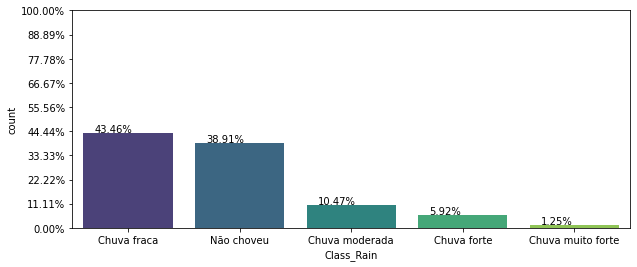

In [250]:
total = len(df_RD80_MP3000A_DataQuality)
plt.figure(figsize=(10,4))
ax = sns.countplot(x = 'Class_Rain', data = df_RD80_MP3000A_DataQuality, palette='viridis')
for p in ax.patches:
        ax.annotate('{:.2f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))
ax.yaxis.set_ticks(np.linspace(0, total, 10))
ax.set_yticklabels(map('{:.2f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
plt.show()

In [251]:
df_RD80_MP3000A_DataQuality.head()

,Datetime,Ano,Mes,dia,H,M,S,Rain_Intensity_mm_h,radar_reflectivity_1_mm6m3,Liquid_watercontent_g_m3,...,Without_Rain,Class_Rain_id,Class_Rain,Date,Year,Month,Day_of_week,Time,session,DataQuality
0,2021-08-15 15:08:00,2021,8,15,15,8,0,0.24632,26.14197,0.02150,...,0,1,Chuva fraca,2021-08-15,2021,Aug,Sunday,15:08:00,Afternoon,1.0
1,2021-10-10 14:02:00,2021,10,10,14,2,0,0.00470,0.10926,0.00078,...,1,0,Não choveu,2021-10-10,2021,Oct,Sunday,14:02:00,Afternoon,1.0
2,2021-11-06 21:11:00,2021,11,6,21,11,0,0.06033,9.64492,0.00517,...,1,0,Não choveu,2021-11-06,2021,Nov,Saturday,21:11:00,Evening,1.0
3,2021-11-08 18:03:00,2021,11,8,18,3,0,0.15814,19.52376,0.01257,...,0,1,Chuva fraca,2021-11-08,2021,Nov,Monday,18:03:00,Afternoon,1.0
4,2021-11-08 18:34:00,2021,11,8,18,34,0,2.93372,1107.89575,0.17042,...,0,2,Chuva moderada,2021-11-08,2021,Nov,Monday,18:34:00,Afternoon,1.0


In [252]:
df_RD80_MP3000A_DataQuality = df_RD80_MP3000A_DataQuality.query("(Class_Rain != 'Não choveu')")

In [253]:
df_RD80_MP3000A_DataQuality

,Datetime,Ano,Mes,dia,H,M,S,Rain_Intensity_mm_h,radar_reflectivity_1_mm6m3,Liquid_watercontent_g_m3,...,Without_Rain,Class_Rain_id,Class_Rain,Date,Year,Month,Day_of_week,Time,session,DataQuality
0,2021-08-15 15:08:00,2021,8,15,15,8,0,0.24632,26.14197,0.02150,...,0,1,Chuva fraca,2021-08-15,2021,Aug,Sunday,15:08:00,Afternoon,1.0
3,2021-11-08 18:03:00,2021,11,8,18,3,0,0.15814,19.52376,0.01257,...,0,1,Chuva fraca,2021-11-08,2021,Nov,Monday,18:03:00,Afternoon,1.0
4,2021-11-08 18:34:00,2021,11,8,18,34,0,2.93372,1107.89575,0.17042,...,0,2,Chuva moderada,2021-11-08,2021,Nov,Monday,18:34:00,Afternoon,1.0
6,2021-11-09 04:04:00,2021,11,9,4,4,0,3.58488,519.80615,0.25423,...,0,2,Chuva moderada,2021-11-09,2021,Nov,Tuesday,04:04:00,Night,1.0
7,2021-11-09 04:09:00,2021,11,9,4,9,0,6.03651,1105.08691,0.39305,...,0,2,Chuva moderada,2021-11-09,2021,Nov,Tuesday,04:09:00,Night,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
873,2022-05-27 16:13:00,2022,5,27,16,13,0,1.72540,3401.65234,0.06885,...,0,1,Chuva fraca,2022-05-27,2022,May,Friday,16:13:00,Afternoon,1.0
874,2022-05-29 21:19:00,2022,5,29,21,19,0,2.09853,803.45435,0.11511,...,0,1,Chuva fraca,2022-05-29,2022,May,Sunday,21:19:00,Evening,1.0
875,2022-05-30 18:32:00,2022,5,30,18,32,0,1.90520,359.81525,0.12783,...,0,1,Chuva fraca,2022-05-30,2022,May,Monday,18:32:00,Afternoon,1.0
876,2022-05-30 18:53:00,2022,5,30,18,53,0,1.79349,642.84375,0.10457,...,0,1,Chuva fraca,2022-05-30,2022,May,Monday,18:53:00,Afternoon,1.0


In [254]:
df_RD80_MP3000A_DataQuality.columns

Index(['Datetime', 'Ano', 'Mes', 'dia', 'H', 'M', 'S', 'Rain_Intensity_mm_h',
       'radar_reflectivity_1_mm6m3', 'Liquid_watercontent_g_m3',
       'Mean_weight_diameter_mm', 'Time_integration_s', 'N_D1', 'N_D2', 'N_D3',
       'N_D4', 'N_D5', 'N_D6', 'N_D7', 'N_D8', 'N_D9', 'N_D10', 'N_D11',
       'N_D12', 'N_D13', 'N_D14', 'N_D15', 'N_D16', 'N_D14.1', 'N_D18',
       'N_D19', 'N_D20', 'Ch_22_234', 'Ch_22_500', 'Ch_23_034', 'Ch_23_834',
       'Ch_25_000', 'Ch_26_234', 'Ch_28_000', 'Ch_30_000', 'Ch_51_248',
       'Ch_51_760', 'Ch_52_280', 'Ch_52_804', 'Ch_53_336', 'Ch_53_848',
       'Ch_54_400', 'Ch_54_940', 'Ch_55_500', 'Ch_56_020', 'Ch_56_660',
       'Ch_57_288', 'Ch_57_964', 'Ch_58_800', 'Light_Rain', 'Moderate_Rain',
       'Heavy_Rain', 'Very_Heavy_Rain', 'Without_Rain', 'Class_Rain_id',
       'Class_Rain', 'Date', 'Year', 'Month', 'Day_of_week', 'Time', 'session',
       'DataQuality'],
      dtype='object')

Com exceção da nossa **target** ***Class_Rain***, vamos alterar o tipo de todas as **Features** escolhidas para o tipo **float64**.

In [255]:
df_multisensors[df_multisensors.columns[0:7]] = df_multisensors[df_multisensors.columns[0:7]].astype('float64')
df_multisensors.dtypes

Liquid_watercontent_g_m3    float64
Ch_22_500                   float64
Ch_23_034                   float64
Ch_23_834                   float64
Ch_25_000                   float64
Ch_26_234                   float64
Ch_30_000                   float64
Class_Rain                   object
dtype: object

In [256]:
df_RD80_MP3000A_Quality = df_RD80_MP3000A.query("DataQuality == 1")

In [257]:
df_RD80_MP3000A_Quality_final = df_RD80_MP3000A_Quality.reset_index()

In [258]:
features_rna = ['Datetime', 'Rain_Intensity_mm_h', 'Ch_22_234', 'Ch_22_500',  'Ch_30_000']

df_multisensors_rna  = df_RD80_MP3000A_Quality_final[features_rna]

In [259]:
df_multisensors_rna['Datetime'] = pd.to_datetime(df_multisensors_rna['Datetime'])

In [260]:
df_multisensors_rna.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879 entries, 0 to 878
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Datetime             879 non-null    datetime64[ns]
 1   Rain_Intensity_mm_h  879 non-null    float64       
 2   Ch_22_234            879 non-null    float64       
 3   Ch_22_500            879 non-null    float64       
 4   Ch_30_000            879 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 34.5 KB


In [261]:
df_multisensors_rna_final = df_multisensors_rna.set_index('Datetime').resample('60T').pad()

In [262]:
#Substituindo valores Nulos por 0 (zero)
df_multisensors_rna_final.fillna(value = 0,  inplace = True) 

In [263]:
df_multisensors_rna_final.isna().sum()

Rain_Intensity_mm_h    0
Ch_22_234              0
Ch_22_500              0
Ch_30_000              0
dtype: int64

In [265]:
df_multisensors_rna_final = df_multisensors_rna_final.reset_index()
#df_multisensors_rna_final = df_multisensors_rna_final.set_index('Datetime')

In [266]:
df_multisensors_rna_final

,Datetime,Rain_Intensity_mm_h,Ch_22_234,Ch_22_500,Ch_30_000
0,2021-08-15 15:00:00,0.00000,0.000,0.000,0.000
1,2021-08-15 16:00:00,0.24632,84.507,83.699,9.393
2,2021-08-15 17:00:00,0.24632,84.507,83.699,9.393
3,2021-08-15 18:00:00,0.24632,84.507,83.699,9.393
4,2021-08-15 19:00:00,0.24632,84.507,83.699,9.393
...,...,...,...,...,...
6937,2022-05-31 16:00:00,0.07105,104.864,104.016,47.213
6938,2022-05-31 17:00:00,0.07105,104.864,104.016,47.213
6939,2022-05-31 18:00:00,0.07105,104.864,104.016,47.213
6940,2022-05-31 19:00:00,0.07105,104.864,104.016,47.213


In [267]:
df_multisensors_rna_final['Date'] = [d.date() for d in df_multisensors_rna_final['Datetime']]

In [268]:
# Criando a coluna hora do dia

df_multisensors_rna_final['Time'] = [d.time() for d in df_multisensors_rna_final['Datetime']]

In [269]:
# Criando a coluna hora do dia

df_multisensors_rna_final['Hour'] = [d.hour for d in df_multisensors_rna_final['Datetime']]

In [272]:
df_multisensors_rna_final

,Datetime,Date,Time,Hour,Ch_22_234,Ch_22_500,Ch_30_000,Rain_Intensity_mm_h
0,2021-08-15 15:00:00,2021-08-15,15:00:00,15,0.000,0.000,0.000,0.00000
1,2021-08-15 16:00:00,2021-08-15,16:00:00,16,84.507,83.699,9.393,0.24632
2,2021-08-15 17:00:00,2021-08-15,17:00:00,17,84.507,83.699,9.393,0.24632
3,2021-08-15 18:00:00,2021-08-15,18:00:00,18,84.507,83.699,9.393,0.24632
4,2021-08-15 19:00:00,2021-08-15,19:00:00,19,84.507,83.699,9.393,0.24632
...,...,...,...,...,...,...,...,...
6937,2022-05-31 16:00:00,2022-05-31,16:00:00,16,104.864,104.016,47.213,0.07105
6938,2022-05-31 17:00:00,2022-05-31,17:00:00,17,104.864,104.016,47.213,0.07105
6939,2022-05-31 18:00:00,2022-05-31,18:00:00,18,104.864,104.016,47.213,0.07105
6940,2022-05-31 19:00:00,2022-05-31,19:00:00,19,104.864,104.016,47.213,0.07105


In [271]:
df_multisensors_rna_final = df_multisensors_rna_final.reindex(columns=['Datetime', 'Date', 'Time', 'Hour',
       'Ch_22_234', 'Ch_22_500', 'Ch_30_000', 'Rain_Intensity_mm_h'])

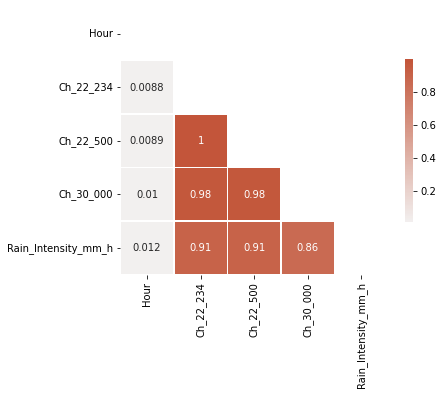

In [274]:
# Generate a mask for the upper triangle

corr = df_multisensors_rna_final.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(6, 6))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})

In [275]:
df_multisensors_rna_final = df_multisensors_rna_final.reset_index(drop=True)

In [276]:
df_multisensors_rna_final

,Datetime,Date,Time,Hour,Ch_22_234,Ch_22_500,Ch_30_000,Rain_Intensity_mm_h
0,2021-08-15 15:00:00,2021-08-15,15:00:00,15,0.000,0.000,0.000,0.00000
1,2021-08-15 16:00:00,2021-08-15,16:00:00,16,84.507,83.699,9.393,0.24632
2,2021-08-15 17:00:00,2021-08-15,17:00:00,17,84.507,83.699,9.393,0.24632
3,2021-08-15 18:00:00,2021-08-15,18:00:00,18,84.507,83.699,9.393,0.24632
4,2021-08-15 19:00:00,2021-08-15,19:00:00,19,84.507,83.699,9.393,0.24632
...,...,...,...,...,...,...,...,...
6937,2022-05-31 16:00:00,2022-05-31,16:00:00,16,104.864,104.016,47.213,0.07105
6938,2022-05-31 17:00:00,2022-05-31,17:00:00,17,104.864,104.016,47.213,0.07105
6939,2022-05-31 18:00:00,2022-05-31,18:00:00,18,104.864,104.016,47.213,0.07105
6940,2022-05-31 19:00:00,2022-05-31,19:00:00,19,104.864,104.016,47.213,0.07105


In [277]:
#Add as colunas referente à intensidade da chuva. 
df_multisensors_rna_final=df_multisensors_rna_final.assign(Class_Rain='Não choveu')
convert_dict = {'Class_Rain':str}  
  
df_multisensors_rna_final = df_multisensors_rna_final.astype(convert_dict)

In [278]:
for index, row in df_multisensors_rna_final.iterrows():

    if (row['Rain_Intensity_mm_h'] >= 20):
      df_multisensors_rna_final.loc[index,'Class_Rain'] = 'Chuva forte'


Vamos olhar como está a **Proporção de classes** do nosso Dataset

In [279]:
df_multisensors_rna_final['Class_Rain'].value_counts()

Não choveu     5704
Chuva forte    1238
Name: Class_Rain, dtype: int64

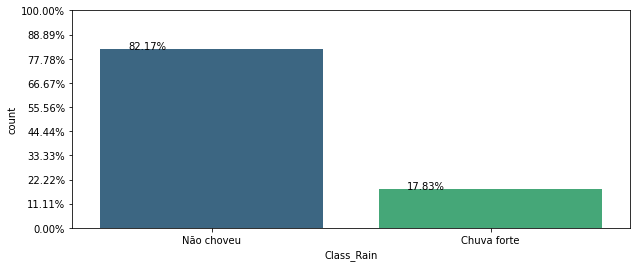

In [280]:
total = len(df_multisensors_rna_final)
plt.figure(figsize=(10,4))
ax = sns.countplot(x = 'Class_Rain', data = df_multisensors_rna_final, palette='viridis')
for p in ax.patches:
        ax.annotate('{:.2f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))
ax.yaxis.set_ticks(np.linspace(0, total, 10))
ax.set_yticklabels(map('{:.2f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
plt.show()

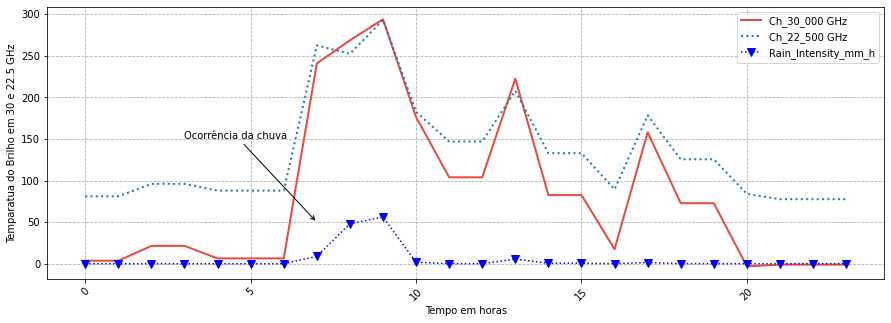

In [282]:
#Plotando o acumulado da intensidade da chuva por horário do dia
df_filter_multisensors_rna_test = df_multisensors_rna_final.query("(Datetime >= '2022-04-12 00:00:00' and Datetime <= '2022-04-12 23:59:59')")

ax = plt.gca()
plt.rcParams["figure.figsize"] = [15,5]

df_filter_multisensors_rna_test.plot(kind='line',x='Hour',y="Ch_30_000", label='Ch_30_000 GHz',linewidth = 2,linestyle='solid', color='#E74C3C', ax=ax)
df_filter_multisensors_rna_test.plot(kind='line',x='Hour',y="Ch_22_500", label='Ch_22_500 GHz',linewidth = 2,linestyle='dotted', ax=ax)
df_filter_multisensors_rna_test.plot(kind="line",x="Hour",y="Rain_Intensity_mm_h",label='Rain_Intensity_mm_h', linestyle='dotted', marker='v', color='b',markerfacecolor='b', markersize=8, ax=ax)


plt.annotate('Ocorrência da chuva', xy=(7, 50), arrowprops=dict(arrowstyle='->'), xytext=(3, 150))

plt.ylabel("Temparatua do Brilho em 30 e 22.5 GHz")
plt.xlabel("Tempo em horas")
plt.xticks(rotation = 45)
plt.grid(False,linestyle='--')
plt.grid(True)

# **Definições para o modelo de Previsão de chuva a curtíssimo prazo**

In [283]:
df_multisensors_rna_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6942 entries, 0 to 6941
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Datetime             6942 non-null   datetime64[ns]
 1   Date                 6942 non-null   object        
 2   Time                 6942 non-null   object        
 3   Hour                 6942 non-null   int64         
 4   Ch_22_234            6942 non-null   float64       
 5   Ch_22_500            6942 non-null   float64       
 6   Ch_30_000            6942 non-null   float64       
 7   Rain_Intensity_mm_h  6942 non-null   float64       
 8   Class_Rain           6942 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(3)
memory usage: 488.2+ KB


**Variáveis ​​categóricas**

Preenchendo valores ausentes com o modo do valor da coluna

In [284]:
# Obter lista de variáveis categóricas
s = (df_multisensors_rna_final.dtypes == "object")
object_cols = list(s[s].index)

print("Variáveis ​​categóricas:")
print(object_cols)

Variáveis ​​categóricas:
['Date', 'Time', 'Class_Rain']


In [285]:
# Valores ausentes em variáveis categóricas

for i in object_cols:
    print(i, df_multisensors_rna_final[i].isnull().sum())

Date 0
Time 0
Class_Rain 0


In [286]:
# Preenchendo valores ausentes com o modo da coluna em valor

for i in object_cols:
    df_multisensors_rna_final[i].fillna(df_multisensors_rna_final[i].mode()[0], inplace=True)

**Variáveis numéricas**

Preenchendo valores ausentes com a mediana do valor da coluna

In [287]:
# Obter lista de variáveis numéricas
t = (df_multisensors_rna_final.dtypes == "float64")
num_cols = list(t[t].index)

print("Variáveis neuméricas:")
print(num_cols)

Variáveis neuméricas:
['Ch_22_234', 'Ch_22_500', 'Ch_30_000', 'Rain_Intensity_mm_h']


In [288]:
# Valores ausentes em variáveis numéricas

for i in num_cols:
    print(i, df_multisensors_rna_final[i].isnull().sum())

Ch_22_234 0
Ch_22_500 0
Ch_30_000 0
Rain_Intensity_mm_h 0


In [289]:
# Preenchendo valores ausentes com mediana da coluna em valor

for i in num_cols:
    df_multisensors_rna_final[i].fillna(df_multisensors_rna_final[i].median(), inplace=True)
    
df_multisensors_rna_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6942 entries, 0 to 6941
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Datetime             6942 non-null   datetime64[ns]
 1   Date                 6942 non-null   object        
 2   Time                 6942 non-null   object        
 3   Hour                 6942 non-null   int64         
 4   Ch_22_234            6942 non-null   float64       
 5   Ch_22_500            6942 non-null   float64       
 6   Ch_30_000            6942 non-null   float64       
 7   Rain_Intensity_mm_h  6942 non-null   float64       
 8   Class_Rain           6942 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(3)
memory usage: 488.2+ KB


In [290]:
# Aplicar codificador de rótulo a cada coluna com dados categóricos
label_encoder = LabelEncoder()
for i in object_cols:
    df_multisensors_rna_final[i] = label_encoder.fit_transform(df_multisensors_rna_final[i])
    
df_multisensors_rna_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6942 entries, 0 to 6941
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Datetime             6942 non-null   datetime64[ns]
 1   Date                 6942 non-null   int64         
 2   Time                 6942 non-null   int64         
 3   Hour                 6942 non-null   int64         
 4   Ch_22_234            6942 non-null   float64       
 5   Ch_22_500            6942 non-null   float64       
 6   Ch_30_000            6942 non-null   float64       
 7   Rain_Intensity_mm_h  6942 non-null   float64       
 8   Class_Rain           6942 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(4)
memory usage: 488.2 KB


In [339]:
# Preparando atributos de dados de escala

features = df_multisensors_rna_final.drop(['Class_Rain', 'Datetime', 'Date','Time', 'Hour','Rain_Intensity_mm_h'], axis=1) # Descarta colunas de destino e extras

target = df_multisensors_rna_final['Rain_Intensity_mm_h']

#Configura um scaler padrão para os recursos
col_names = list(features.columns)
s_scaler = preprocessing.StandardScaler()
features = s_scaler.fit_transform(features)
features = pd.DataFrame(features, columns=col_names) 

features.describe().T

,count,mean,std,min,25%,50%,75%,max
Ch_22_234,6942.0,1.760492e-16,1.000072,-1.789839,-0.664592,-0.586044,0.299245,2.140410
Ch_22_500,6942.0,-1.228250e-17,1.000072,-1.770203,-0.663974,-0.591718,0.309175,2.125221
Ch_30_000,6942.0,-4.094167e-17,1.000072,-1.330414,-0.603399,-0.542846,0.564204,2.120997


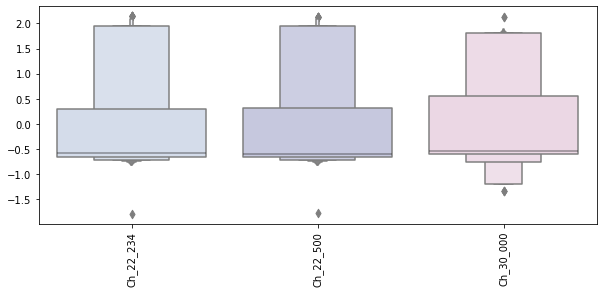

In [340]:
#Detecção de outliers
#Observando os recursos em escala
colours = ["#D0DBEE", "#C2C4E2", "#EED4E5", "#D1E6DC", "#BDE2E2"]
plt.figure(figsize=(10,4))
sns.boxenplot(data = features,palette = colours)
plt.xticks(rotation=90)
plt.show()

In [341]:
features["Rain_Intensity_mm_h"] = target

## **CONSTRUÇÃO DO MODELO**
No presente projeto, será criada uma rede neural artificial na qual os seguintes passos serão executados na construção do modelo:

* Atribuir a X e Y o status de atributos e tags
* Divisão do Dataset em conjuntos de teste e treinamento
* Inicialização da rede neural
* Definições de camadas de rede
* Compilação a rede neural
* Treinamento da rede neural

In [511]:
X = features.drop(["Rain_Intensity_mm_h"], axis=1)
y = features["Rain_Intensity_mm_h"]

# Splitting test and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X.shape

(6942, 3)

In [512]:
#Early stopping
early_stopping = callbacks.EarlyStopping(
    #min_delta=0.001, # minimium amount of change to count as an improvement
    patience=10, # how many epochs to wait before stopping
    restore_best_weights=True,
)

# Initialising the NN
model_ann = Sequential()

# layers

model_ann.add(Dense(units = 32, activation = 'relu', input_dim = 3))
model_ann.add(Dense(units = 32, activation = 'relu'))
model_ann.add(Dense(units = 16, activation = 'relu'))
model_ann.add(Dropout(0.25))
model_ann.add(Dense(units = 8, activation = 'relu'))
model_ann.add(Dropout(0.5))
model_ann.add(Dense(units = 1, activation = 'sigmoid'))

# Compiling the ANN
opt = Adam(learning_rate=0.00009)
model_ann.compile(optimizer = opt, loss = 'mse', metrics = ['accuracy'])

# Train the ANN
history_ann = model_ann.fit(X_train, y_train, batch_size = 32, epochs = 100, validation_split=0.2)

Epoch 1/100
139/139 [==============================] - 1s 4ms/step - loss: 152.2401 - accuracy: 0.0000e+00 - val_loss: 170.5248 - val_accuracy: 0.0000e+00
Epoch 2/100
139/139 [==============================] - 0s 3ms/step - loss: 152.1968 - accuracy: 0.0000e+00 - val_loss: 170.4482 - val_accuracy: 0.0000e+00
Epoch 3/100
139/139 [==============================] - 1s 4ms/step - loss: 152.0414 - accuracy: 0.0000e+00 - val_loss: 170.0830 - val_accuracy: 0.0000e+00
Epoch 4/100
139/139 [==============================] - 1s 4ms/step - loss: 151.3382 - accuracy: 0.0000e+00 - val_loss: 168.7422 - val_accuracy: 0.0000e+00
Epoch 5/100
139/139 [==============================] - 1s 5ms/step - loss: 149.9232 - accuracy: 0.0000e+00 - val_loss: 166.6197 - val_accuracy: 0.0000e+00
Epoch 6/100
139/139 [==============================] - 1s 5ms/step - loss: 148.7361 - accuracy: 2.2512e-04 - val_loss: 165.4695 - val_accuracy: 0.0000e+00
Epoch 7/100
139/139 [==============================] - 1s 4ms/step - l

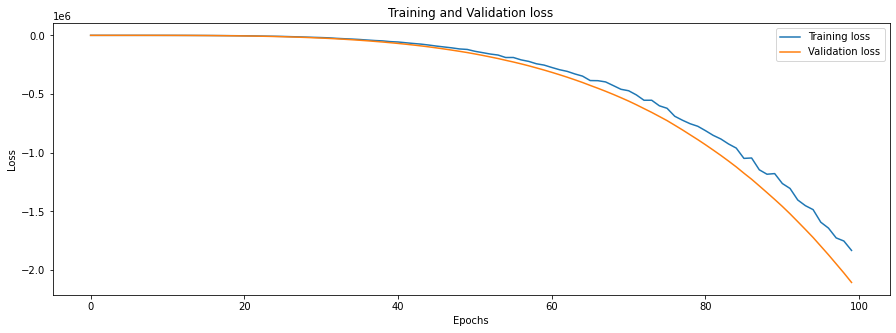

In [368]:
history_df = pd.DataFrame(history_ann.history)

'''plt.plot(history_df['loss'], label='Training loss')
plt.plot(history_df['val_loss'], label='Validation loss')'''

plt.plot(history_df['loss'], label='Training loss')
plt.plot(history_df['val_loss'], label='Validation loss')

plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

plt.show()

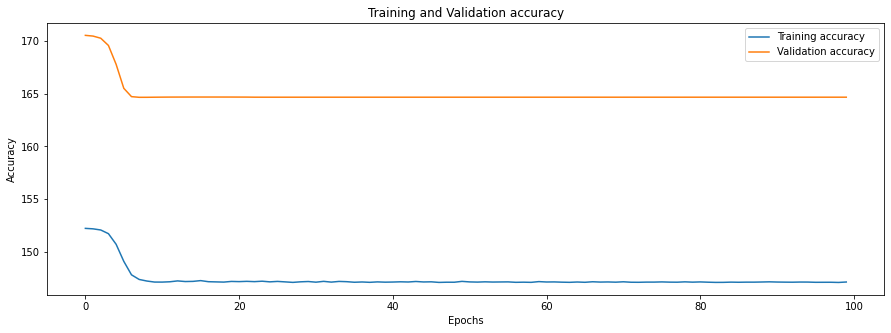

In [371]:
history_df = pd.DataFrame(history_ann.history)

plt.plot(history_df['mean_squared_error'], label='Training accuracy')
plt.plot(history_df['val_mean_squared_error'], label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [372]:
# Predicting the test set results
y_pred = model_ann.predict(X_test)
y_pred = (y_pred > 0.5)

44/44 [==============================] - 0s 2ms/step


ValueError: ignored

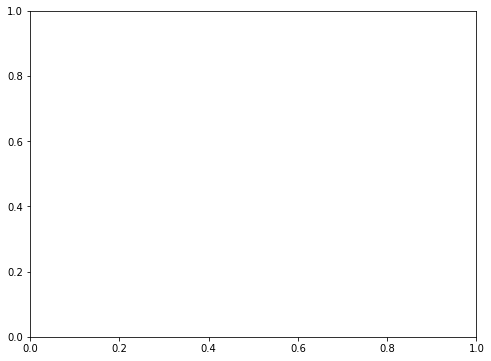

In [373]:
# confusion matrix
cmap1 = sns.diverging_palette(260,-10,s=50,l=75,n=5, as_cmap=True)
plt.subplots(figsize=(8,6))
cf_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':15})

In [376]:
print(classification_report(y_test, y_pred))

NameError: ignored

# **Definições para o modelo de classificação da Chuva**

In [483]:
features_model = df_multisensors_rna_final.drop(['Datetime', 'Date', 'Hour', 'Rain_Intensity_mm_h',
       'Class_Rain'], axis=1)
target_model = df_multisensors_rna_final["Class_Rain"]

Vamos transformar a **string** em enconder para poder fazer a leitura da ***feature*** nas próximas etapas.

In [484]:
#Codificação dos rótulos: convertendo-os de strings para inteiros
le = LabelEncoder()
labels_target = le.fit_transform(target_model.values)
labels_target

array([1, 1, 1, ..., 1, 1, 1])

## **Divisão dos dados em treino, validação e teste**

In [485]:
# realizar uma divisão de teste de treinamento, usando 70% dos dados para
# treinamento e 30% para avaliação


(x_train_rain, x_test_rain, y_train_rain, y_test_rain) = train_test_split(features_model.values, labels_target, random_state=0, test_size=0.30)
print('Tamanho do dataset para treinamento: ',len(x_train_rain))
print('Tamanho do dataset para validação: ',len(x_test_rain))

Tamanho do dataset para treinamento:  4859
Tamanho do dataset para validação:  2083


Verificação do **balanceamento dos dados**

Text(0.5, 0.98, 'Proporção de classes')

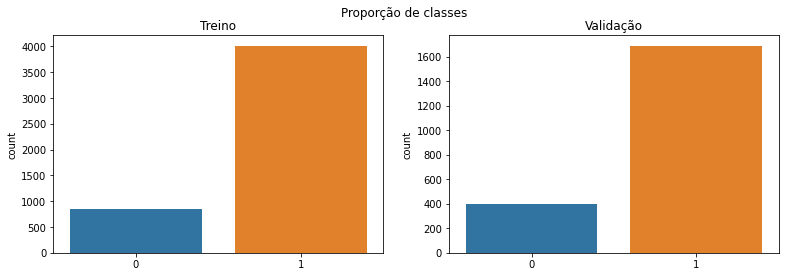

In [486]:
fig, ax = plt.subplots(1,2,figsize=(13,4))
sns.countplot(y_train_rain,ax=ax[0])
sns.countplot(y_test_rain,ax=ax[1])
ax[0].set_title('Treino')
ax[1].set_title('Validação')
fig.suptitle('Proporção de classes')

Como podemos ver os nossos dados de treinamento estão desbalanceados. Vamos aplicar um balanceamento:

In [ ]:
#Balanceamento dos dados
import smote_variants as sv

oversampler= sv.MulticlassOversampling(oversampler='distance_SMOTE',
                                      oversampler_params={'random_state': 5})
x_train_rain, y_train_rain= oversampler.sample(x_train_rain, y_train_rain)

Text(0.5, 0.98, 'Proporção de classes')

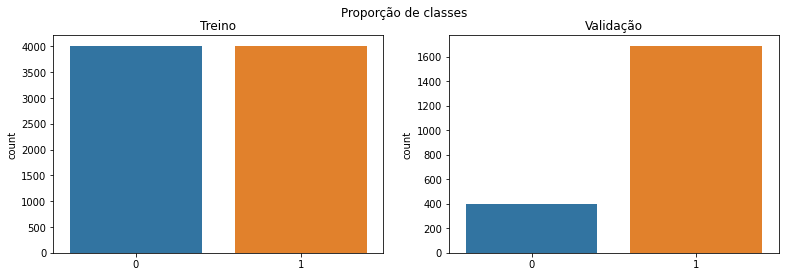

In [488]:
fig, ax = plt.subplots(1,2,figsize=(13,4))
sns.countplot(y_train_rain,ax=ax[0])
sns.countplot(y_test_rain,ax=ax[1])
ax[0].set_title('Treino')
ax[1].set_title('Validação')
fig.suptitle('Proporção de classes')

Vamos verificar o tamanho dos dados de treino e teste, novamente.

In [489]:
print('Tamanho do dataset para treinamento: ',len(x_train_rain))
print('Tamanho do dataset para validação: ',len(x_test_rain))

Tamanho do dataset para treinamento:  8030
Tamanho do dataset para validação:  2083


Para treinar uma rede MLP, os dados devem ser sempre dimensionados, pois são muito sensíveis a eles.

In [490]:
#Normalização
sc=StandardScaler()

scaler = sc.fit(x_train_rain)
x_train_rain_scaled = scaler.transform(x_train_rain)
x_test_rain_scaled = scaler.transform(x_test_rain)

#**DEFINIÇÕES DO MODELO**
A partir daqui iremos criar e treinar os mdelos

* **Arquitetura 1**: Vamos definir três camadas ocultas para nossa Rede Neural, com **20**, **15** e **10 neurônios**, respectivamente, usando o solver = '**SGD**' e **L2** aplicada aos pesos para evitar que eles fiquem muito grandes. Também aplicaremos o **momentum** para atualização de gradiente descendente.



In [491]:
#Definições do modelo
MLP_model_1 = MLPClassifier(hidden_layer_sizes=(20,15,5),
                        activation = 'relu',
                        max_iter = 100,
                        n_iter_no_change=500,
                        random_state=1,
                        alpha=0.0005, #L2
                        batch_size=32,
                        learning_rate='constant',
                        solver = 'adam',
                        verbose=True)

* **Arquitetura 2**: Vamos definir três camadas ocultas para nossa Rede Neural, com **20**, **15** e **10 neurônios**, respectivamente, usando o solver = '**ADAM**' e **L2** aplicada aos pesos para evitar que eles fiquem muito grandes. Não aplicaremos o **momentum**;

In [492]:
#Definições
MLP_model_2 = MLPClassifier(hidden_layer_sizes=(20,15,10),
                        activation = 'relu',
                        max_iter = 100,
                        #tol = 0.00000001, #Tolerância minima
                        n_iter_no_change=300,
                        random_state=1,
                        alpha=0.0005, #L2
                        batch_size=32,
                        learning_rate='constant',
                        solver = 'adam',
                        verbose=True)



In [493]:
models = [MLP_model_1, MLP_model_2]

**Treino dos modelos**

In [ ]:
# Treino dos modelos

for i in range(0,2):
  print(f'\nTreinando o modelo:\n{models[i]}\n')
  models[i].fit(x_train_rain_scaled, y_train_rain)

## **Visualização do resultado do treinamento através de uma curva de aprendizagem**

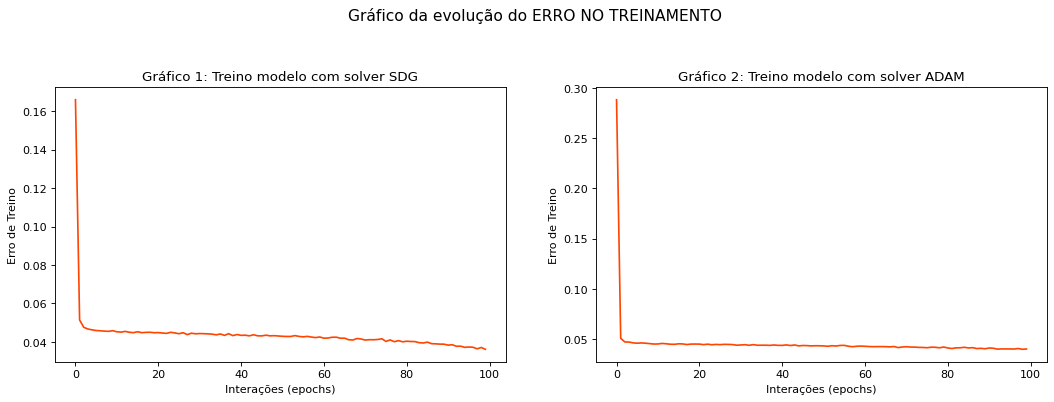

In [495]:
# Traçar a CURVA DE APRENDIZAGEM
labels_title = ['Gráfico 1: Treino modelo com solver SDG', 'Gráfico 2: Treino modelo com solver ADAM']
plt.figure(figsize=(16,10),dpi=80)
plt.suptitle('Gráfico da evolução do ERRO NO TREINAMENTO', size=14)
for i in range(0,2):

  plt.subplot(2,2,i+1)
  plt.title(labels_title[i])
  plt.xlabel("Interações (epochs)")
  plt.ylabel("Erro de Treino")
  plt.plot(models[i].loss_curve_, color='#FF4500', label="MLP - Evolução do ERRO DE TREINO")
plt.show()

Gráfico da evolução do ERRO durante o treinamento do modelo com o solver **SGD** e com o solver **Adam**.

# **AVALIAÇÃO DO MODELO**
Para avaliar nosso classificador, vamos utilizar a métrica RMSE (root mean squared error), o relatório de classificação e a matriz de confusão e, ao final, iremos realizar um último teste, utilizando novos dados nos quais o modelo também não "viu" durante o treinamento.

## **Previsões sobre nossos dados e mostragem da pontuação de precisão**

In [496]:
# Fazendo previsões sobre nossos dados e mostrando uma pontuação de precisão
MLP_accur = []
predictions = []
labels_title = ['Modelo COM momentum', 'Modelo SEM momentum']
for i in range(0,2):
  print(f'\n{labels_title[i]}')
  predictions.append(models[i].predict(x_test_rain_scaled))
  MLP_accur.append(round((accuracy_score(y_test_rain, predictions[i]))*100,2))


  print(f"\nPontuação do conjunto de treinamento: {round((models[i].score(x_train_rain_scaled, y_train_rain)*100),2)}%")

  print(f'A pontuação de precisão da capacidade do modelo MLP de classificar a chuva é: {MLP_accur[i]}%\n')
  score_obj = dict(zip(['Accuracy Score'], [[MLP_accur[i]]]))
  score_df = pd.DataFrame(score_obj, index=['MLP'])
  print(score_df)
  print("|------------------------------------------------------------------------------------|")


Modelo COM momentum

Pontuação do conjunto de treinamento: 99.18%
A pontuação de precisão da capacidade do modelo MLP de classificar a chuva é: 98.66%

     Accuracy Score
MLP           98.66
|------------------------------------------------------------------------------------|

Modelo SEM momentum

Pontuação do conjunto de treinamento: 99.19%
A pontuação de precisão da capacidade do modelo MLP de classificar a chuva é: 98.66%

     Accuracy Score
MLP           98.66
|------------------------------------------------------------------------------------|


Podemos perceber que a precisão da capacidade do modelo MLP de classificar a chuva chega a **98.5% usando o momentum**, enquanto o modelo **sem o momentum chega a 95.94%**.

## **Métrica RMSE**

A métrica RMSE é uma medida de distância entre o destino previsto e a resposta real. Quanto menor o valor de RMSE, melhor será a precisão preditiva de um modelo. Dito de outra maneira, é uma métrica que retorna a magnitude do erro e não do acerto. Um modelo com uma RMSE igual a 0 teria suas previsões perfeitamente corretas.

In [497]:
for i in range(0,2):
  rmse = sqrt(mean_squared_error(y_test_rain, predictions[i]))
  print(f'RMSE {labels_title[i]}: {round(rmse, 3)}')

RMSE Modelo COM momentum: 0.116
RMSE Modelo SEM momentum: 0.116


## **Relatório de classificação**

In [499]:

labels = ['Não choveu','Chuva forte']
for i in range(0,2):
  print(f'\nclassification_report do Modelo')
  print(classification_report(y_test_rain, predictions[i], target_names=labels, zero_division=0)) #zero_division=0


classification_report do Modelo
              precision    recall  f1-score   support

  Não choveu       0.94      0.99      0.97       394
 Chuva forte       1.00      0.99      0.99      1689

    accuracy                           0.99      2083
   macro avg       0.97      0.99      0.98      2083
weighted avg       0.99      0.99      0.99      2083


classification_report do Modelo
              precision    recall  f1-score   support

  Não choveu       0.94      0.99      0.97       394
 Chuva forte       1.00      0.99      0.99      1689

    accuracy                           0.99      2083
   macro avg       0.97      0.99      0.98      2083
weighted avg       0.99      0.99      0.99      2083



## **Matriz de confusão do melhor modelo**

In [500]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (12,5), fontsize=14):
  
  confusion_matrix = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1)[:, np.newaxis]
  df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names )
  fig = plt.figure(figsize=figsize)
  try:
    heatmap = sns.heatmap(df_cm, annot=True, fmt=".2f")
  except ValueError:
    raise ValueError("Os valores da matriz de confusão devem ser inteiros.")
  heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=11)
  heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=11)
  plt.title('Matriz de confusão do Classificador', fontsize=15)
  plt.ylabel('Classe verdadeira', fontsize=fontsize)
  plt.xlabel('Classe prevista', fontsize=fontsize)

In [501]:
predictions_2 = models[0].predict(x_test_rain_scaled)
labels = ['Não choveu','Chuva forte']
c = confusion_matrix(y_test_rain, predictions_2)

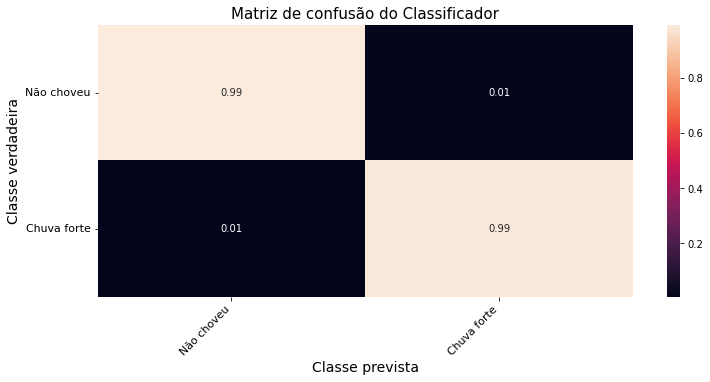

In [502]:
#Exibe a matriz de confusão
print_confusion_matrix(c, class_names=labels)

## **Classificação da chuva para novos dados**

Afim de tentar confirmar os resultados da avaliação nos testes, vamos usar a função **sample()** do **pandas** para selecionar aleatoriamente algumas rows do nosso Dataframe para testar novamente o modelo de classificação da chuva e ver como ele se comporta.

In [503]:
df_multisensors_rna_final.columns

Index(['Datetime', 'Date', 'Time', 'Hour', 'Ch_22_234', 'Ch_22_500',
       'Ch_30_000', 'Rain_Intensity_mm_h', 'Class_Rain'],
      dtype='object')

In [510]:
# Seleciona uma linha do dataframe aleatoriamente
class_real = []
res_class_predict = []
indexes = []
for res in range(0,10):
  for res in range(0,1):

    
    indexes.append(res)
    df_RD80_class_real = df_multisensors_rna_final.sample(axis = 0)
    class_real.append(df_RD80_class_real['Class_Rain'])

    df_RD80_class_predict = df_RD80_class_real.drop(columns=['Datetime', 'Date', 'Time', 'Rain_Intensity_mm_h','Class_Rain'])

    #Teste de classificação da chuva com o modelo

    result_predict_class = le.classes_[models[0].predict(np.array([df_RD80_class_predict]).reshape(1,-1))][0]
    res_class_predict.append(result_predict_class)

    #class_real = pd.DataFrame(class_real)
    resultados = {'ID':indexes,'Classe Real':class_real[0], 'Classe Predita':res_class_predict}
    df_resultados = pd.DataFrame.from_dict(resultados, orient='index')

    df_resultados = df_resultados.T

    df_resultados.dropna(inplace=True)
    df_resultados.reset_index(inplace=True, drop=True)

df_resultados.head(n=10)


,ID,Classe Real,Classe Predita
0,0.0,1.0,1.0


In [521]:
from keras.models import Sequential
from keras.layers import Dense,Input
from keras.callbacks import History
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import metrics


history = History()
df = df_multisensors_rna_final
df=df.dropna()
a=list(df.columns)


df1=df[[a[4],a[5],a[6]]]
Y = df[a[7]]

print(Y)


0       0.00000
1       0.24632
2       0.24632
3       0.24632
4       0.24632
         ...   
6937    0.07105
6938    0.07105
6939    0.07105
6940    0.07105
6941    0.07105
Name: Rain_Intensity_mm_h, Length: 6942, dtype: float64


In [542]:
#######################################  
model_a = Sequential()

model_a.add(Dense(20, activation='tanh', input_shape=(3,)))
model_a.add(Dense(10, activation='sigmoid'))
model_a.add(Dense(1))

model_a.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])
print(model_a.summary())


Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_108 (Dense)           (None, 20)                80        
                                                                 
 dense_109 (Dense)           (None, 10)                210       
                                                                 
 dense_110 (Dense)           (None, 1)                 11        
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________
None


In [543]:

X_train, X_test, Y_train, Y_test = train_test_split(df1, Y, test_size=0.2, random_state=42)

history1 = model_a.fit(X_train, Y_train,validation_data=(X_test,Y_test),epochs=100,batch_size=32,verbose=2, callbacks = [history])

predictions = model_a.predict(X_test)
print(predictions)

model_a.save('./model_predict_rain.h5')
print("Modelo salvo!")



Epoch 1/100
174/174 - 3s - loss: 151.3683 - mean_absolute_error: 5.7884 - val_loss: 141.2817 - val_mean_absolute_error: 6.1777 - 3s/epoch - 19ms/step
Epoch 2/100
174/174 - 1s - loss: 134.7472 - mean_absolute_error: 5.9247 - val_loss: 131.3623 - val_mean_absolute_error: 6.1921 - 717ms/epoch - 4ms/step
Epoch 3/100
174/174 - 0s - loss: 126.2176 - mean_absolute_error: 5.6715 - val_loss: 122.1198 - val_mean_absolute_error: 5.6562 - 393ms/epoch - 2ms/step
Epoch 4/100
174/174 - 0s - loss: 117.6159 - mean_absolute_error: 5.1231 - val_loss: 113.6050 - val_mean_absolute_error: 5.2534 - 297ms/epoch - 2ms/step
Epoch 5/100
174/174 - 0s - loss: 110.0239 - mean_absolute_error: 4.8476 - val_loss: 105.8590 - val_mean_absolute_error: 5.0343 - 307ms/epoch - 2ms/step
Epoch 6/100
174/174 - 0s - loss: 103.1935 - mean_absolute_error: 4.6473 - val_loss: 98.9621 - val_mean_absolute_error: 4.8849 - 314ms/epoch - 2ms/step
Epoch 7/100
174/174 - 0s - loss: 96.9702 - mean_absolute_error: 4.4914 - val_loss: 92.4541 

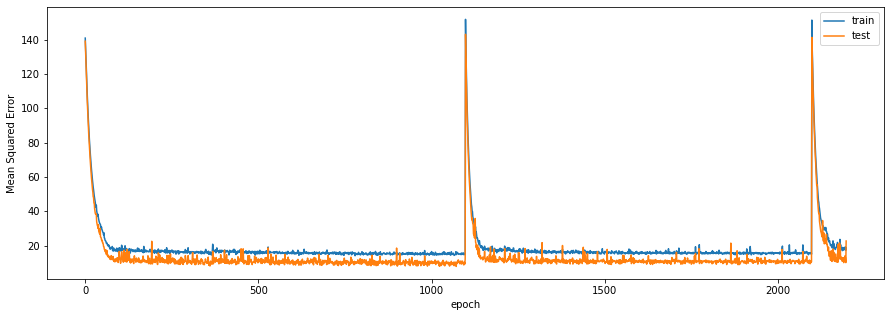

In [544]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])

plt.ylabel('Mean Squared Error')
plt.xlabel('epoch')
plt.legend(['train','test'])
plt.show()

<Figure size 864x864 with 0 Axes>

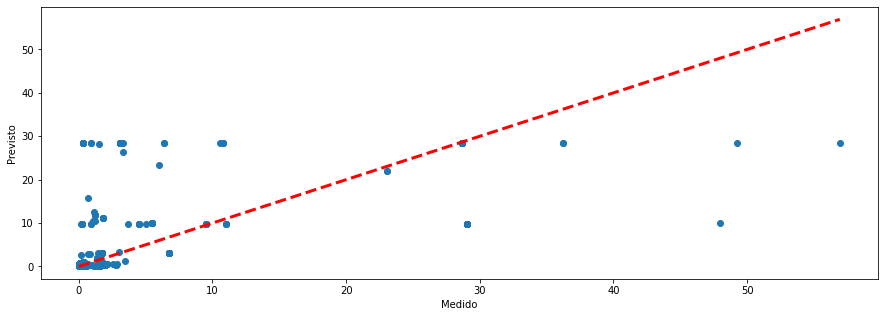

In [545]:

plt.figure(figsize=(12,12))
fig, ax = plt.subplots()
ax.scatter(Y_test, predictions)
ax.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=3, color='r')
ax.set_xlabel('Medido')
ax.set_ylabel('Previsto')
plt.show()



In [529]:
# RMSE
print("Erro quadrático médio (MSE): ",np.sqrt(metrics.mean_squared_error(Y_test, predictions)))
print("Erro absoluto médio (MAE)",metrics.mean_absolute_error(Y_test, predictions))

Erro quadrático médio (MSE):  3.4826344388115613
Erro absoluto médio (MAE) 1.0386628331204295


In [1702]:
df_multisensors_rna_final.columns

Index(['Datetime', 'Date', 'Time', 'Liquid_watercontent_g_m3', 'Ch_22_234',
       'Ch_22_500', 'Ch_30_000', 'Ch_51_248', 'Rain_Intensity_mm_h',
       'Class_Rain'],
      dtype='object')

In [530]:
# IMPORTING LIBRARIES
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from keras.layers import Dense
from keras.models import Sequential

# FETCHING DATA
data = df_multisensors_rna_final
print(len(data))                # 25551 data points

# DATA CLEANING (removing missing values)
data.dropna(inplace=True)

# ENCODING OUTPUT 
#data['Class_Rain'] = [1 if i != 'Não choveu' else 0 for i in data["Class_Rain"]]

# DISTINGUISHING INPUT AND OUTPUT
x = data[['Ch_22_234','Ch_22_500', 'Ch_30_000']]
y = data['Class_Rain']

# SPLITTING INTO TRAIN AND TEST SET
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4)

# FEATURE SCALING 
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# BUILDING THE MODEL
model_b  = Sequential()
model_b.add(Dense(units= 32, activation = 'relu', input_dim=3))
model_b.add(Dense(units= 16, activation = 'relu'))
model_b.add(Dense(units= 1, activation = 'sigmoid'))

# COMPILATION OF MODEL USING 'ADAM' OPTIMIZER
model_b.compile(optimizer='adam',loss='binary_crossentropy',metrics=['mae', 'mse'])

# TRAINING THE MODEL 
history2 = model_b.fit(x_train,y_train, batch_size=32, epochs=500,verbose= 1)

# SAVING THE MODEL
model_b.save("model.h5")



In [ ]:
# PREDICTION 
pred = model_b.predict(x_test)
pred = [ 1 if y>=0.5 else 0 for y in pred]
pred_df = pd.DataFrame(pred)

pred_df.head(n=100)



In [532]:
# COMPUTING CONFUSION MATRIX
cm = confusion_matrix(y_test, pred)
cm

array([[ 496,    2],
       [  15, 2264]])

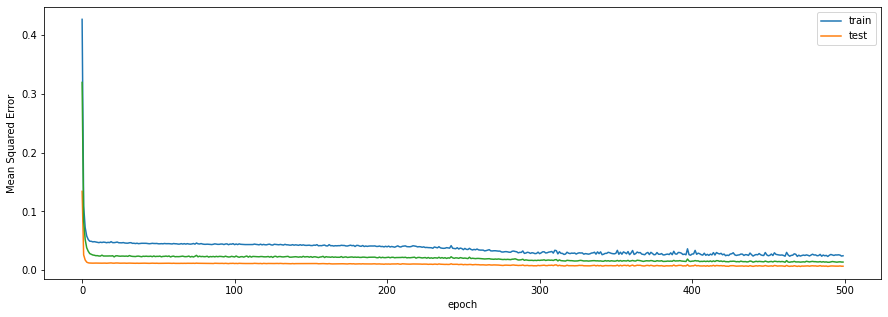

In [534]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['mse'])
plt.plot(history2.history['mae'])

plt.ylabel('Mean Squared Error')
plt.xlabel('epoch')
plt.legend(['train','test'])
plt.show()

# **CONSIDERAÇÕES FINAIS**

No presente notebook, objetivou-se apresentar a implementação de um modelo de Rede Neural Artificial, uma , que fosse capaz de predizer  e classificar a chuva. O estudo concentrou-se em três aspectos: entradas e métodos de modelagem e técnicas de pré-processamento.  

De modo geral, o nosso modelo consegiu atingir uma acurácia de 98.4% nos dados de treino e 91% nos dados de validação. Por outro lado, mesmo que a acurácia tenha sido bem alta ela não obteve o mesmo desempenho na classificação de "Chuva moderada" e "Chuva muito forte". Pressupe-se que isso pode ser melhorado aplicando técnicas de data augmentation. 

Por fim, embora o aumento da base de dados tenha se mostrado necessário, os resultados observados nas métricas do cenário de avaliação nos levou a inferir que o modelo se mostrou eficiente, apresentando boa acurácia e precisão nos testes de classificação. 


# **TRABALHOS FUTUROS**

Melhorias do modelo desenvolvido para classificação da chuva desenvolvido no estudo podem ser apoiadas com pelo menos a instalação de outro sistema disdrômetro no entorno da área de estudo. Isso pode permitir uma melhor validação do modelo de rede neural que está sendo proposto, fazendo uso da correlação dos parâmetros de chuva observados.

# **REFERÊNCIAS**

BASHEER, I. A.; HAJMEER, M. Artificial neural networks: fundamentals, computing, design, and application. Journal of Microbiological Methods, v. 43, p. 3–31, 2000

HAYKIN, Simon. Redes Neurais : princípios e prática. Traduzido por Paulo Martins Engel. 2. ed. Porto Alegre : Bookman, 2001. 900 p. il.

HSU, K. L.; GAO, X.; SOROOSHIAN, S.; GUPTA, H. V. Precipitation estimation from remotely sensed information using artificial neural networks. Journal of Applied Meteorology, v. 36, n. 9, p. 1176-1190, 1997.

https://towardsdatascience.com/deep-learning-which-loss-and-activation-functions-should-i-use-ac02f1c56aa8

https://sites.icmc.usp.br/andre/research/neural/MLP.htm

https://acervolima.com/diferenca-entre-ann-cnn-e-rnn/

KOVAKS, Z. L. Redes Neurais Artificiais: fundamentos e Aplicações. São Paulo: Acadêmica, 1996.

TAFNER, Malcon A.; XEREZ, Marcos de; RODRIGUES FILHO, Ilson W. Redes neurais artificiais : introdução e princípios de neurocomputação. Blumenau : Eko, 1995.

Hinton, Geoffrey, Nitish Srivastava, and Kevin Swersky. “Neural Networks for Machine Learning Lecture 6a Overview of Mini--Batch Gradient Descent,” 2012.